# Ecosystem Stabiltiy & Hypervolumes

In [38]:
source('00_hv_functions.R')
require('dplyr')

### Sorted Data

In [42]:
# load sorted tree data (Species count matrix)
tree_df <- read.csv("../Results/trees_matrix.csv", header=T, row.names=1)

# make into workable matrix in R
tree_cm <- count_matrix(tree_df)

# and caluculate relative abundances
tree_am <- rel_abnd(tree_df)

## Species Ordination: this is where i'm not certain

- Nonmetric multidimensional scaling from reading this http://ordination.okstate.edu/overview.htm#Nonmetric_Multidimensional_Scaling
- I've done it based on species counts at each subplot (hv are then caluclated at plot level). I think by doing it like this it means plots are comparable but im not convinced...
- Does mean that axis dont mean anything so maybe not useful anyway?
- not distance preserving, hypervolumes package doesnt recommend this... http://www.benjaminblonder.org/hypervolume_faq.html

In [43]:
# Nonmetric Multidimensional Scaling
#tree_count_mds <- metaMDS(tree_cm, k = 3, trymax = 100)
#tree_relab_mds <- metaMDS(tree_am, k = 3, trymax = 100)

# save the output so  dont have to wait each time...
#save(tree_count_mds, tree_relab_mds, file = "../Results/tree_mds_out.Rdata")

## Compare the hypervolumes!

In [44]:
# load in the output from ordination
load("../Results/tree_mds_out.Rdata")

tree_df   <- as.data.frame(tree_relab_mds$points)

# split the subplot_plot_census column
tree_df$plot    <- unlist(strsplit(row.names(tree_df), "_"))[ c(T,F,F)] 
tree_df$subplot <- unlist(strsplit(row.names(tree_df), "_"))[ c(F,T,F)] 
tree_df$census  <- unlist(strsplit(row.names(tree_df), "_"))[ c(F,F,T)]

### svm *vs* gaussion?
- from what i can tell there is alot of randomness in the output of svm vs gaussion...
    - but they do often seem easier to interpret

In [45]:
# pick a plot ('BNorth' 'BSouth' 'Belian' 'DC1' 'DC2' 'E' 'LF' 'Seraya' 'Tower')
plot <- 'Tower'

#### svm
- Constructs a hypervolume by building a one-class support vector machine that classifies data points as ’in’ and other locations as ’out’. This is accomplished by 1) transforming the input data into a high-dimensional nonlinear space in which the data points can be optimally separated from background by a single hyperplane, 2) back-transforming the hyperplane into the original space, 3) delineating an adaptive grid of random points near the original data points, and 4) using the SVM to predict if each of these points is in or out.


Building Hypervolume  4  of  4

Comparing Hypervolume pairs 6  of  6



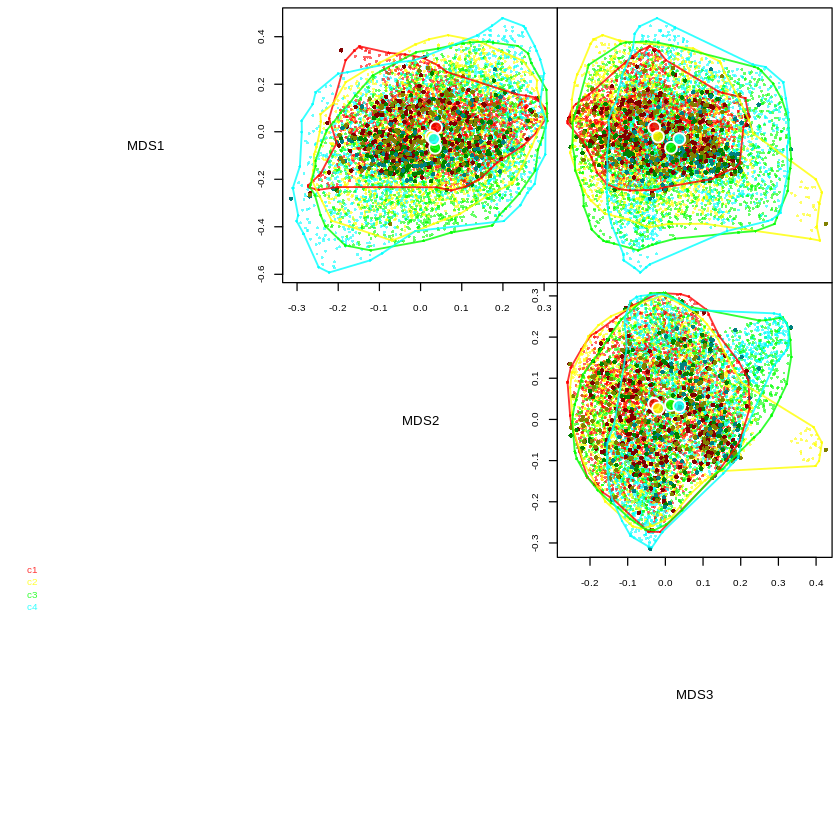

In [47]:
svm <- compare_hypervolumes(df = subset(tree_df, plot == plot), compare = "census", type = "svm", plot = TRUE)

#### gaussian
- Constructs a hypervolume by building a Gaussian kernel density estimate on an adaptive grid of random points wrapping around the original data points. The bandwidth vector reflects the axisaligned standard deviations of a hyperelliptical kernel.


Building Hypervolume  4  of  4

Comparing Hypervolume pairs 6  of  6



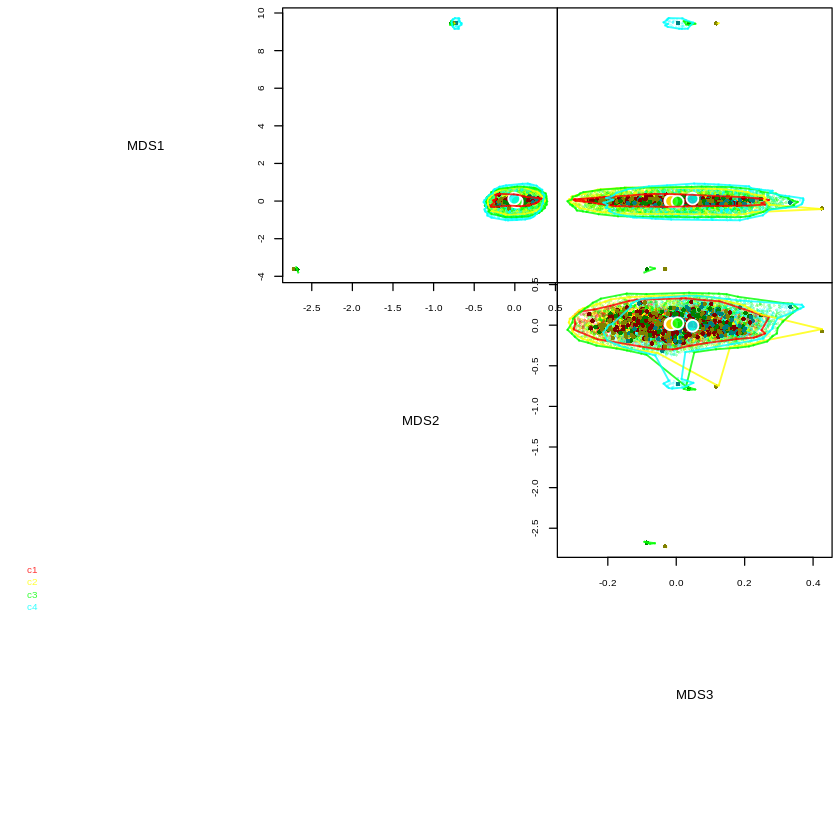

In [48]:
gaussian <- compare_hypervolumes(df = subset(tree_df, plot == plot), compare = "census", type = "gaussian", plot = TRUE)

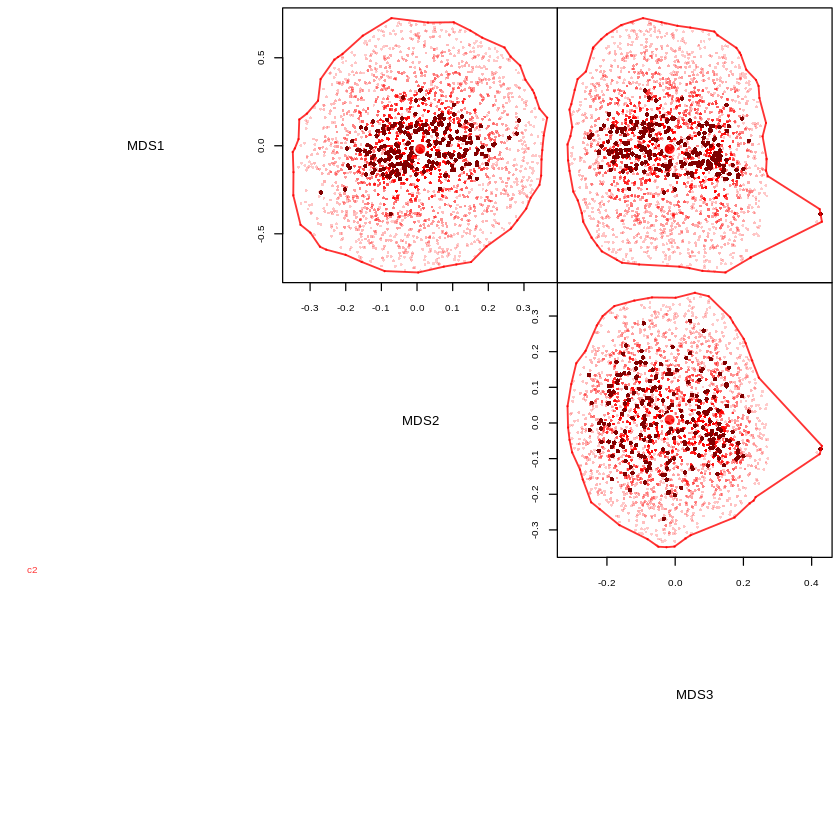

In [59]:
plot(gaussian@hvlist[[c("c2")]], show.3d = F)

## Compare Plots


Building Hypervolume  9  of  9

Comparing Hypervolume pairs 36  of  36



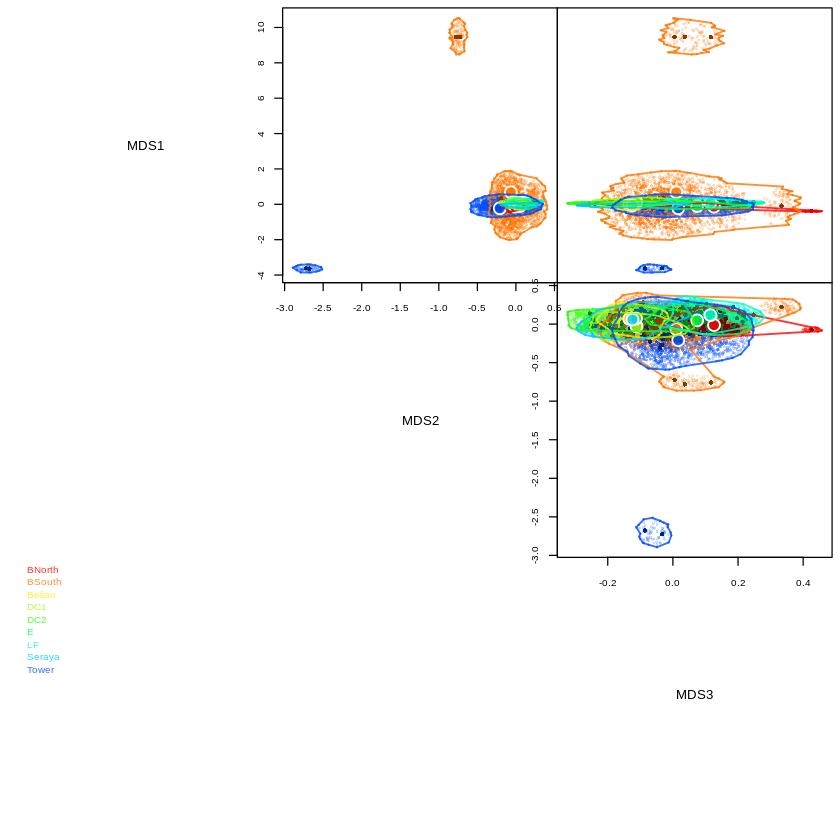

In [60]:
# pick a census ('c1' 'c2' 'c3' 'c4')
census <- "c1"

compare_census <- compare_hypervolumes(df = subset(tree_df, census == census), compare = "plot", type = "gaussian", plot = TRUE)

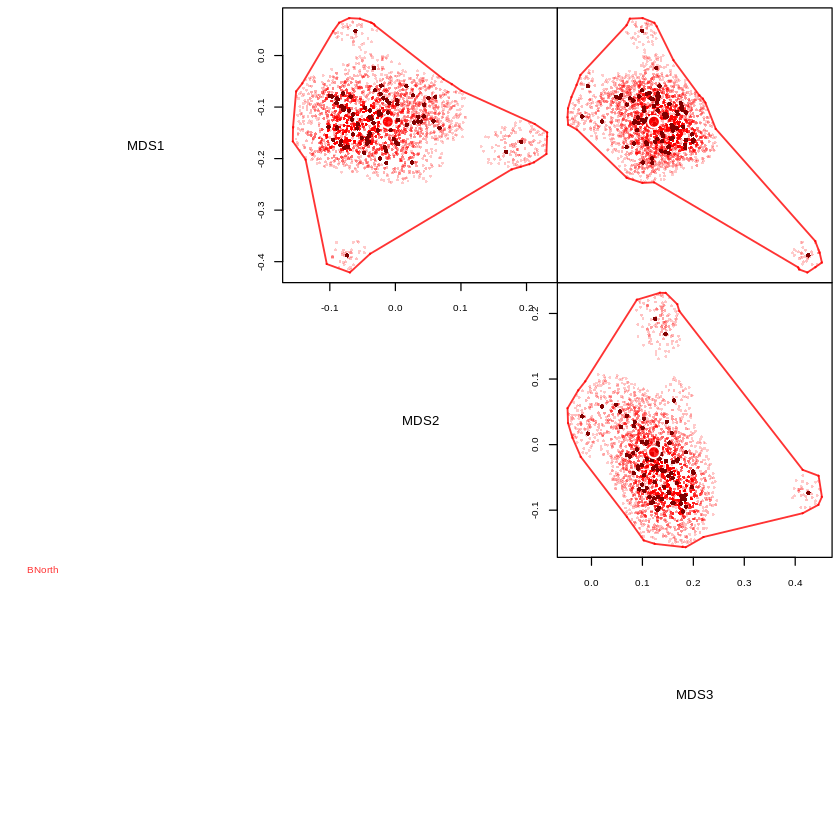

In [61]:
plot(compare_census@hvlist[[c("BNorth")]], show.3d = F)

## Fuctional Traits

#### Trees
- Currently using
    - Biomass
    - height
    - simpsons diversity
    - variance in biomass
    
- Other possabilities/is data aviable?
    - Seeds
    - Leaves
    - etc.

##### For mammals
- sex
- weight measures
- parasites
- Age
- Fat_score and a load of others which i'm not sure what they are
    - HF
    - E
    - AGD
    - HB
    - T
    - MZ
    
#### No data for beetles

In [63]:
tree_func <- read.csv("../Results/tree_axis.csv")
tree_func[is.na(tree_func)] <- 0
tree_func <- tree_func[c("plot", "subplot", "census", "simpdv", "avghgtnorm", "tbiomcnorm", "biovar")]

#### Census


Building Hypervolume  4  of  4

Comparing Hypervolume pairs 6  of  6



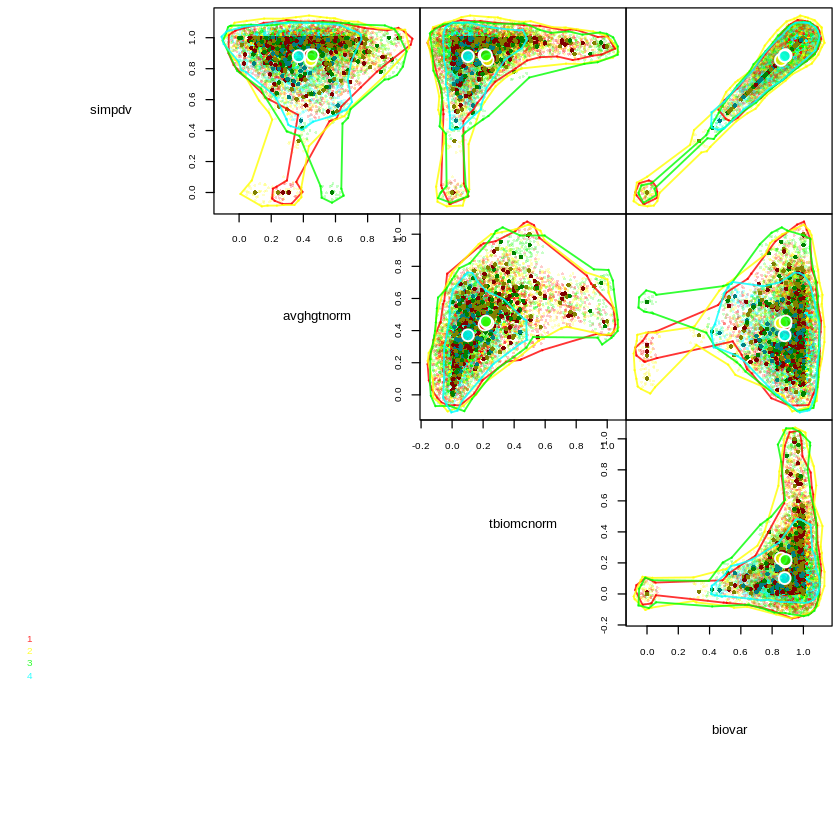

In [64]:
# Choose a plot
plot = "Tower"

cc_func <- compare_hypervolumes(df = subset(tree_func, plot == plot), compare = "census", type = "gaussian", plot = TRUE)

#### Plots


Building Hypervolume  9  of  9

Comparing Hypervolume pairs 36  of  36



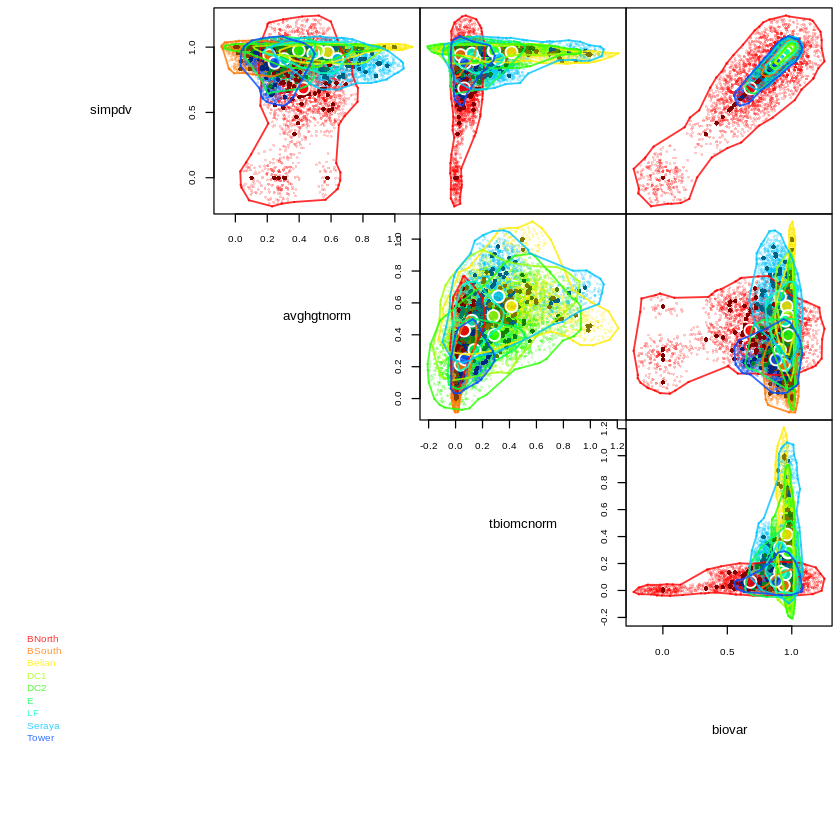

In [65]:
# Choose a census
census = "c1"

cp_func <- compare_hypervolumes(df = subset(tree_func, census == census), compare = "plot", type = "gaussian", plot = TRUE)

In [66]:
cc_func

An object of class "hv_comp"
Slot "name":
[1] "Plot: BNorth comparing census"

Slot "hvlist":
HypervolumeList with 4 elements:

***** Object of class Hypervolume *****
Name: 1
Method: Gaussian kernel density estimate
Number of data points (after weighting): 222
Dimensionality: 4
Volume: 0.037776
Random point density: 1168696.777590
Number of random points: 44149
Random point values:
	min: 0.015
	mean: 0.110
	median: 0.046
	max:1.989
Parameters:
	kde.bandwidth: 0.04333787 0.06408971 0.06324614 0.04333787
	samples.per.point: 451
	sd.count: 3
	quantile.requested: 0.95
	quantile.requested.type: probability
***** Object of class Hypervolume *****
Name: 2
Method: Gaussian kernel density estimate
Number of data points (after weighting): 225
Dimensionality: 4
Volume: 0.056939
Random point density: 768800.295093
Number of random points: 43775
Random point values:
	min: 0.009
	mean: 0.072
	median: 0.029
	max:1.250
Parameters:
	kde.bandwidth: 0.05226838 0.06455220 0.06446934 0.05226838
	samples.p

In [ ]:
cc_func